In [1]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('climate_frog1520_7vars.csv')
X = df[['aet_mean','pet_mean', 'ppt_mean', 'srad_mean', 'tmax_mean', 'tmin_mean','vap_mean']]
y = df['occurrenceStatus']

#### Do some EDA on the time series

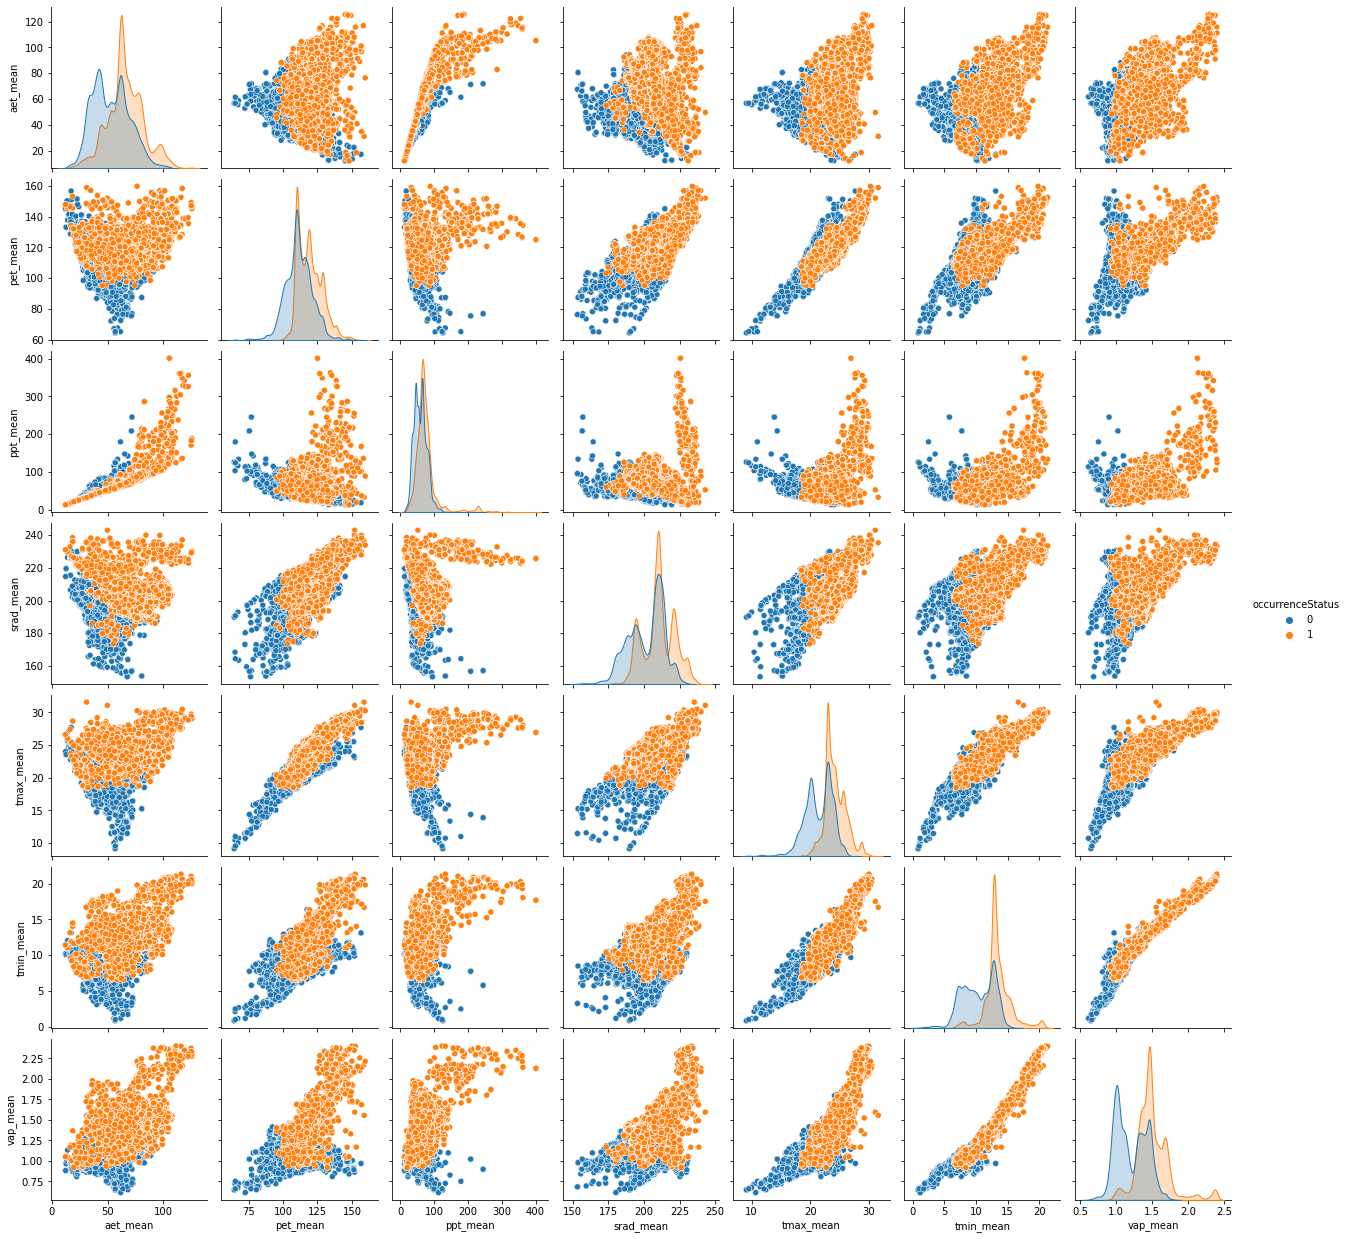

In [21]:
sns.pairplot(data = df[['aet_mean','pet_mean', 'ppt_mean', 'srad_mean', 'tmax_mean', 'tmin_mean','vap_mean','occurrenceStatus']], 
             hue = 'occurrenceStatus')

### Try a LR pipeline
#### Update from Thursday: save a validation set, which will be used to draw curves. Do gridsearch on other set

In [6]:
# Since we're definitely using standardized data for LR, we will first do a transformation inplace
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42)

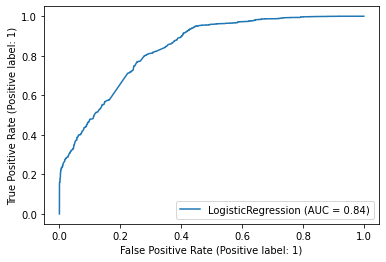

f1:  0.7792342904702455


In [57]:
# First see how yesterday's best parameters work on the test set. 
# Fit it on our new train data and see roc curve
from sklearn.metrics import plot_roc_curve, roc_curve
logistic = LogisticRegression(random_state = 42, C=0.00018, solver='saga', penalty='l1')
logistic.fit(X_train,y_train)
plot_roc_curve(logistic,X_validation,y_validation)
plt.show()

# And print out the f1 score & confusion matrix
y_pred = logistic.predict(X_validation)
print("f1: ", f1_score(y_validation, y_pred))

#### So we will use this as a baseline and try to improve upon it

The Best Model is :  LogisticRegression(C=10, random_state=42, solver='sag')


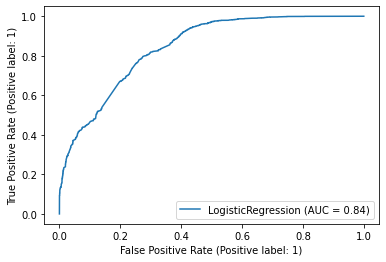

f1:  0.7792261966837001


In [67]:
# Do a gridsearch with l2 penalty on X_train, then validate on X_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score
params = {'C':[0.0001,0.001,0.01,0.1,1,10], 'solver': ['newton-cg','lbfgs','liblinear','sag','saga']}
logisticl2 = LogisticRegression(random_state = 42, penalty = 'l2')
scorings = ["roc_auc", 'f1',"precision"]
clf = GridSearchCV(estimator = logisticl2, param_grid = params, cv = 4, scoring = scorings, refit = 'roc_auc')
clf.fit(X_train,y_train)
print("The Best Model is : ", clf.best_estimator_)
# Changing the refit parameter in the GridSearch will lead to diff params. 
# Let's see the preformance of the best estimator for each of the refit score
logisticl2_bestroc = LogisticRegression(C = 10, random_state = 42, solver = 'sag').fit(X_train,y_train)
plot_roc_curve(logisticl2_bestroc,X_validation,y_validation)
plt.show()
y_pred_l2_bestroc = logisticl2_bestroc.predict(X_validation)
print("f1: ", f1_score(y_validation, y_pred_l2_bestroc))

The Best Model is :  LogisticRegression(C=0.0001, random_state=42, solver='newton-cg')


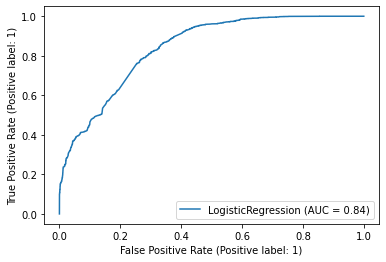

f1:  0.7836294416243655


In [70]:
# Repeat the above process, but changing the refit and cv
params = {'C':[0.0001,0.001,0.01,0.1,1,10], 'solver': ['newton-cg','lbfgs','liblinear','sag','saga']}
logisticl2 = LogisticRegression(random_state = 42, penalty = 'l2')
scorings = ["roc_auc", 'f1',"precision"]
clf2 = GridSearchCV(estimator = logisticl2, param_grid = params, cv = 5, scoring = scorings, refit = 'f1')
clf2.fit(X_train,y_train)
print("The Best Model is : ", clf2.best_estimator_)
# Changing the refit parameter in the GridSearch will lead to diff params. 
# Let's see the preformance of the best estimator for each of the refit score
logisticl2_bestf1 = LogisticRegression(C = 0.0001, random_state = 42, solver = 'newton-cg').fit(X_train,y_train)
plot_roc_curve(logisticl2_bestf1,X_validation,y_validation)
plt.show()
y_pred_l2_bestf1 = logisticl2_bestf1.predict(X_validation)
print("f1: ", f1_score(y_validation, y_pred_l2_bestf1))

The Best Model is :  LogisticRegression(C=0.001, random_state=42, solver='saga')


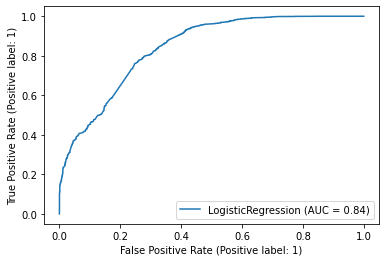

f1:  0.7838929026774331
The Best Model is :  LogisticRegression(C=0.001, random_state=42, solver='liblinear')


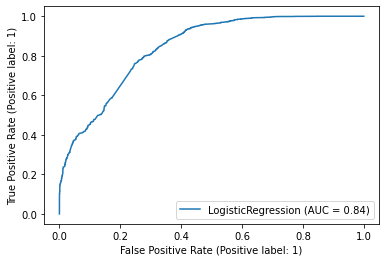

f1:  0.7839388145315487


In [76]:
# Repeat the above process, but changing the refit and cv
params = {'C':[0.0001,0.001,0.01,0.1,1,10], 'solver': ['newton-cg','lbfgs','liblinear','sag','saga']}
logisticl2 = LogisticRegression(random_state = 42, penalty = 'l2')
scorings = ["roc_auc", 'f1',"precision"]
clf3 = GridSearchCV(estimator = logisticl2, param_grid = params, cv = 20, scoring = scorings, refit = 'precision')
clf3.fit(X_train,y_train)
print("The Best Model is : ", clf3.best_estimator_)

# Let's see the preformance of the best estimator for each of the refit score
logisticl2_bestprecision1 = LogisticRegression(C = 0.001, random_state = 42, solver = 'saga').fit(X_train,y_train)
plot_roc_curve(logisticl2_bestprecision1,X_validation,y_validation)
plt.show()
y_pred_l2_bestprecision1 = logisticl2_bestprecision1.predict(X_validation)
print("f1: ", f1_score(y_validation, y_pred_l2_bestprecision1))

# Repeat the above process, but changing the refit and cv
params = {'C':[0.0001,0.001,0.01,0.1,1,10], 'solver': ['newton-cg','lbfgs','liblinear','sag','saga']}
logisticl2 = LogisticRegression(random_state = 42, penalty = 'l2')
scorings = ["roc_auc", 'f1',"precision"]
clf4 = GridSearchCV(estimator = logisticl2, param_grid = params, cv = 4, scoring = scorings, refit = 'precision')
clf4.fit(X_train,y_train)
print("The Best Model is : ", clf4.best_estimator_)

# Let's see the preformance of the best estimator for each of the refit score
logisticl2_bestprecision2 = LogisticRegression(C = 0.001, random_state = 42, solver = 'liblinear').fit(X_train,y_train)
plot_roc_curve(logisticl2_bestprecision2,X_validation,y_validation)
plt.show()
y_pred_l2_bestprecision2 = logisticl2_bestprecision2.predict(X_validation)
print("f1: ", f1_score(y_validation, y_pred_l2_bestprecision2))

### Below is code from w9 Thursday

#### K-fold
Using k=4 will reduce the variance of our generalization but then the algorithm might not be evaluated against enough test sets to give an unbiased generalization/performance estimate. The training set will be smaller, but luckily the testing set will be larger.

Using k=1000 will maximize our number of training examples, but performance will have high variance, causing our generalization/performance estimates to be overestimated. This can lead to overfitting since our testing data is too small to be able to trust our generalization performance with that set of hyperparameters.

In [16]:
from sklearn.model_selection import cross_validate
score1 = cross_validate(pipe,X,y, cv = 20, scoring =['f1', 'accuracy' ] )
score2 = cross_validate(pipe,X,y, cv = 4,scoring =['f1', 'accuracy' ])
print('AFTER SPECIFYING RANDOM STATE')
score1['test_f1'], score1['test_accuracy'], score2['test_f1'], score2['test_accuracy']

AFTER SPECIFYING RANDOM STATE


(array([0.80789566, 0.71412257, 0.72545387, 0.73754647, 0.76989557,
        0.81614035, 0.77100613, 0.75352877, 0.78843441, 0.81692094,
        0.81099896, 0.7415647 , 0.75309541, 0.78538158, 0.79119318,
        0.81258741, 0.80523153, 0.73353752, 0.78148547, 0.73532669]),
 array([0.78130016, 0.69863563, 0.7025291 , 0.71657969, 0.74347652,
        0.78964271, 0.7450823 , 0.72661582, 0.75913288, 0.78803693,
        0.78201525, 0.72019269, 0.72782015, 0.75953432, 0.76395022,
        0.78482537, 0.77880369, 0.72059414, 0.75551987, 0.71216379]),
 array([0.52906137, 0.73721367, 0.72377928, 0.75223146]),
 array([0.58108542, 0.7190912 , 0.72067443, 0.74146929]))

*Since we want to have more 0, we will try to also maximize precision score*

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, make_scorer, precision_score

score1 = cross_validate(pipe,X,y, cv = 20, scoring = ['f1','precision'])
score2 = cross_validate(pipe,X,y, cv = 4, scoring = ['f1','precision'])
print('AFTER SPECIFYING RANDOM STATE')
score1['test_f1'], score1['test_precision'], score2['test_f1'], score2['test_precision']

AFTER SPECIFYING RANDOM STATE


(array([0.67505721, 0.70692521, 0.72031077, 0.81977034, 0.77469136,
        0.75816993, 0.73700954, 0.80598555, 0.82150101, 0.82626263,
        0.75591398, 0.76550999, 0.78873239, 0.77938144, 0.79916536,
        0.80916791, 0.78033473, 0.78008299, 0.78578892, 0.74946695]),
 array([0.654102  , 0.66527633, 0.67887029, 0.70959378, 0.68579235,
        0.7030303 , 0.66826923, 0.71520147, 0.71936057, 0.72197705,
        0.69397828, 0.69004739, 0.70654206, 0.69167429, 0.71588785,
        0.7       , 0.70046948, 0.69565217, 0.70411985, 0.68252427]),
 array([0.51879499, 0.79234351, 0.74402502, 0.75002771]),
 array([0.59510703, 0.70489691, 0.70542143, 0.70641052]))

#### Grid Search for best C, using l1 penalty

In [28]:
from sklearn.model_selection import GridSearchCV
# First, a gridsearch with l1 penalty to prevent overfit
params = {'logistic__C':[0.001,0.01,0.1,1,10], 'logistic__solver': ['liblinear','saga'], }
logisticl1 = ('logistic',LogisticRegression(random_state = 42, penalty = 'l1')) # change penalty to l1
pipel1 = Pipeline(steps=[scaler,logisticl1])
clf = GridSearchCV(estimator = pipel1, param_grid = params,cv = 4, verbose = 3,scoring = 'f1')
clf.fit(X,y)
clf.best_estimator_

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END logistic__C=0.001, logistic__solver=liblinear;, score=0.674 total time=   0.0s
[CV 2/4] END logistic__C=0.001, logistic__solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/4] END logistic__C=0.001, logistic__solver=liblinear;, score=0.776 total time=   0.0s
[CV 4/4] END logistic__C=0.001, logistic__solver=liblinear;, score=0.764 total time=   0.0s
[CV 1/4] END logistic__C=0.001, logistic__solver=saga;, score=0.670 total time=   0.0s
[CV 2/4] END logistic__C=0.001, logistic__solver=saga;, score=0.781 total time=   0.0s
[CV 3/4] END logistic__C=0.001, logistic__solver=saga;, score=0.776 total time=   0.0s
[CV 4/4] END logistic__C=0.001, logistic__solver=saga;, score=0.762 total time=   0.0s
[CV 1/4] END logistic__C=0.01, logistic__solver=liblinear;, score=0.552 total time=   0.0s
[CV 2/4] END logistic__C=0.01, logistic__solver=liblinear;, score=0.759 total time=   0.0s
[CV 3/4] END logistic__C=0.01, logistic__

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.001, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [33]:
# Updated gridsearch
params2 = {'logistic__C':[0.00018, 0.0002,0.00025], 'logistic__solver': ['liblinear','saga'] }
clf2 = GridSearchCV(estimator = pipel1, param_grid = params2,cv = 5, verbose = 3,scoring = 'f1')
clf2.fit(X,y)
clf2.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END logistic__C=0.00017, logistic__solver=liblinear;, score=0.750 total time=   0.0s
[CV 2/5] END logistic__C=0.00017, logistic__solver=liblinear;, score=0.716 total time=   0.0s
[CV 3/5] END logistic__C=0.00017, logistic__solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END logistic__C=0.00017, logistic__solver=liblinear;, score=0.791 total time=   0.0s
[CV 5/5] END logistic__C=0.00017, logistic__solver=liblinear;, score=0.782 total time=   0.0s
[CV 1/5] END logistic__C=0.00017, logistic__solver=saga;, score=0.750 total time=   0.0s
[CV 2/5] END logistic__C=0.00017, logistic__solver=saga;, score=0.745 total time=   0.0s
[CV 3/5] END logistic__C=0.00017, logistic__solver=saga;, score=0.798 total time=   0.0s
[CV 4/5] END logistic__C=0.00017, logistic__solver=saga;, score=0.791 total time=   0.0s
[CV 5/5] END logistic__C=0.00017, logistic__solver=saga;, score=0.782 total time=   0.0s
[CV 1/5] END logistic__C=

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.00018, penalty='l1', random_state=42,
                                    solver='saga'))])

In [34]:
from sklearn.pipeline import Pipeline
scaler = ('scaler', StandardScaler())
logistic = ('logistic',LogisticRegression(random_state = 42, C=0.00018, solver='saga', penalty='l1')) # default penalty is l2
pipe = Pipeline(steps=[scaler,logistic])

In [ ]:
# best parameters from gridsearch
bestparam = {'logistic__C':0.00018, 'logistic__solver': 'saga'}
pipe_l1 = Pipeline(steps=[scaler,logistic])